In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

import sys
sys.path.insert(0, "/Users/lili/dropbox_lili/outliers_package/blackSheep/")
import blacksheep as deva
sns.set(font = 'arial', style = 'white', color_codes=True, font_scale = 1.3)

# Reading in data

In [2]:
values = deva.read_in_values('brca/phospho_common_samples_data.csv')

In [3]:
values.iloc[0:10, 0:10]

,TCGA-AO-A12D,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,TCGA-A2-A0EX,TCGA-AN-A04A,TCGA-BH-A0AV,TCGA-C8-A12T
index,,,,,,,,,,
NP_001611-S1007s,-0.919089,-0.086607,-2.700983,1.301494,2.952304,-0.663642,-2.718940,-0.194798,-0.262126,-0.457748
NP_001611-S1010s,-1.271514,-0.315189,-2.208631,1.820337,3.049420,-0.371558,4.472473,-0.787656,1.760293,2.286200
NP_001611-S1023s,NaN,NaN,NaN,-0.302638,3.157830,0.528494,2.208079,NaN,NaN,NaN
NP_001611-S1042s,-2.298519,0.819633,-0.419166,1.570435,0.883498,0.043851,0.214017,0.902432,1.842090,0.637370
NP_001611-S1068s,-0.802335,-1.585542,-1.411369,1.394314,2.412517,-0.847546,0.042516,0.189233,0.089599,1.215691
NP_001611-S106s,-0.090999,-0.909909,0.243135,0.137665,1.251637,0.762161,0.743054,-0.377080,0.263417,NaN
NP_001611-S106s S109s,-0.393695,NaN,NaN,-0.559680,1.102574,2.633662,-0.701624,0.369745,0.392247,NaN
NP_001611-S1088s,0.378180,-1.963816,0.113174,4.324115,-3.310578,-0.551135,-0.535937,0.608657,-0.967620,0.305143
NP_001611-S110s,-0.374236,1.058329,0.298119,0.568448,1.902091,1.227332,2.245867,0.932517,1.784832,0.757341


In [4]:
annotations = deva.read_in_values('brca/annotations_common_samples.csv')

In [5]:
annotations.head(10)

,Sample ID,Biospecimen Barcode Side,UIUD,PAM50,ER Status,PR Status,HER2 Status,QC Status,Proteome Cluster (see Fig. 3b),Phosphoproteome Cluster (see Fig. 3b),...,iTRAQReporterIon,CommonControl,GATA3 Mutation,PIK3CA Mutation,TP53 Mutation,PIK3CA missense mutation in helical domain all tumors,PIK3CA missense mutation in kinase domain all tumors,TP53 Nonsense/Frameshift all tumors,TP53 Missense mutation all tumors,TP53 missense mutations in DNA binding domain all tumors
TCGA-AO-A12D,AO-A12D,TCGA-AO-A12D-01A-41-A21V-30,1DC52613-0C9C-4107-A800-6CF8A5DBC1D7,Her2,Negative,Negative,Positive,pass,1.0,1.0,...,114,YES,NaN,NaN,Frame_Shift_Del|Somatic|p.C242fs,0.0,0.0,1.0,NaN,NaN
TCGA-BH-A18Q,BH-A18Q,TCGA-BH-A18Q-01A-41-A21W-30,5188E257-2542-42DE-AB8F-D1011AA35509,Basal,Negative,Negative,Negative,pass,1.0,3.0,...,115,NO,NaN,NaN,Frame_Shift_Ins|Somatic|p.P76fs,0.0,0.0,1.0,NaN,NaN
TCGA-C8-A130,C8-A130,TCGA-C8-A130-01A-41-A21V-30,28E062F4-E9E6-468B-BF72-BA973B111CCB,Her2,Positive,Positive,Equivocal,pass,2.0,1.0,...,116,YES,NaN,Missense_Mutation|Somatic|p.H1047R,Frame_Shift_Del|Somatic|p.N131fs,NaN,1.0,1.0,NaN,NaN
TCGA-C8-A138,C8-A138,TCGA-C8-A138-01A-14-A21W-30,035ADBBA-464A-4569-9E07-8B6A6BD12407,Her2,Positive,Negative,Positive,pass,2.0,2.0,...,114,YES,NaN,NaN,Frame_Shift_Del|Somatic|p.L308fs,0.0,0.0,1.0,NaN,NaN
TCGA-E2-A154,E2-A154,TCGA-E2-A154-01A-41-A21V-30,7DC5DC2F-EE63-4A02-BF6D-950B8A913082,LumA,Positive,Positive,Negative,pass,3.0,3.0,...,115,NO,NaN,Missense_Mutation|Somatic|p.H1047L,NaN,NaN,1.0,0.0,0.0,0.0
TCGA-C8-A12L,C8-A12L,TCGA-C8-A12L-01A-41-A21V-30,44DAA2B1-5B90-4430-8466-648EBBAAB29F,Her2,Negative,Negative,Positive,pass,1.0,1.0,...,115,NO,NaN,Missense_Mutation|Somatic|p.H1047R,Missense_Mutation|Somatic|p.C238F,NaN,1.0,NaN,1.0,1.0
TCGA-A2-A0EX,A2-A0EX,TCGA-A2-A0EX-01A-41-A21V-30,78271500-147B-40C5-B789-0CF0C7CDBCE2,LumA,Positive,Positive,Negative,pass,3.0,3.0,...,116,NO,NaN,Missense_Mutation|Somatic|p.E545K,NaN,1.0,NaN,0.0,0.0,0.0
TCGA-AN-A04A,AN-A04A,TCGA-AN-A04A-01A-31-A21W-30,8ED12A60-C75C-4805-813C-6510554BC9DA,LumA,Positive,Positive,Negative,pass,2.0,1.0,...,115,YES,Frame_Shift_Del|Somatic|p.P420fs,NaN,NaN,0.0,0.0,0.0,0.0,0.0
TCGA-BH-A0AV,BH-A0AV,TCGA-BH-A0AV-01A-32-A21V-30,15F6637A-B3FD-4827-9D26-C50B7B4DDE21,Basal,Negative,Negative,Negative,pass,3.0,3.0,...,116,NO,NaN,NaN,Missense_Mutation|Somatic|p.R248Q,0.0,0.0,NaN,1.0,1.0
TCGA-C8-A12T,C8-A12T,TCGA-C8-A12T-01A-41-A21V-30,E8B7EC10-4F67-41F5-A418-0EF440C0A626,Her2,Positive,Positive,Positive,pass,2.0,2.0,...,116,YES,NaN,Missense_Mutation|Somatic|p.E542K,NaN,1.0,NaN,0.0,0.0,0.0


# Isolating which samples annotations for which I want to perform comparisons

In [6]:
for col in ['GATA3 Mutation','PIK3CA Mutation','TP53 Mutation']:
    new_col = '.'.join(col.split()+['Status'])
    annotations[new_col] = annotations[col].isnull()==False

annotations = deva.binarize_annotations(annotations[[
    'PAM50', 
    'ER Status', 
    'PR Status', 
    'GATA3.Mutation.Status',
    'PIK3CA.Mutation.Status',
    'TP53.Mutation.Status'
]])

# Performing differential outlier analysis for each annotation column

In [7]:
directions = ['up', 'down']

In [8]:
results = {}
for updown in directions:
    results[updown] = deva.deva(
        values, annotations,
        aggregate=False,
        save_outlier_table=True, 
        save_frac_table=True, 
        save_qvalues=True,
        up_or_down=updown, 
        save_comparison_summaries=True, 
        output_prefix="output/no_agg/brca",
    )

/Users/lili/anaconda3/envs/blacksheep/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
08/28/2019 10:34:57:WARNING:No rows tested for fisherFDR_PAM50_LumA_not-LumA
08/28/2019 10:34:57:WARNING:No rows tested for fisherFDR_PAM50_LumB_not-LumB
08/28/2019 10:34:58:WARNING:No rows tested for fisherFDR_PAM50_Basal_not-Basal
08/28/2019 10:34:58:WARNING:No rows tested for fisherFDR_PAM50_Her2_not-Her2
08/28/2019 10:34:58:WARNING:No rows tested for fisherFDR_ER Status_Positive
08/28/2019 10:34:59:WARNING:No rows tested for fisherFDR_PR Status_Positive
08/28/2019 10:34:59:WARNING:No rows tested for fisherFDR_GATA3.Mutation.Status_False
08/28/2019 10:34:59:WARNING:No rows tested for fisherFDR_PIK3CA.Mutation.Status_False
08/28/2019 10:34:59:WARNING:No rows tested for fisherFDR_PIK3CA.Mutation.Status_True
08/28/2019 10:34:59:WARNING:No rows tested for fisherFDR_TP53.Mutation.Status_True
08/28/2019 10:35:00:WARNI

In [14]:
results['up'][1].df['fisherFDR_PAM50_Her2_Her2'].sort_index()

NP_000204-S1454s                        NaN
NP_000215-S23s                     0.008331
NP_000215-S30s                     0.001751
NP_000290-S155s                         NaN
NP_000413-S44s                          NaN
NP_000415-S31s                          NaN
NP_000415-S571s S573s                   NaN
NP_000537-S315s                         NaN
NP_000910-S919s                         NaN
NP_001002295-S115s                      NaN
NP_001002814-S202s                 0.009458
NP_001010924-S525s                      NaN
NP_001015055-S543s                      NaN
NP_001020262-S621s                 0.020777
NP_001025055-S1165s                     NaN
NP_001059-S1517s S1519s                 NaN
NP_001073960-S659s                      NaN
NP_001073960-T722t                      NaN
NP_001091868-S173s                 0.004509
NP_001129069-S1701s                     NaN
NP_001129069-S1716s                     NaN
NP_001129663-S171s T176t                NaN
NP_001136157-S821s              

# Making heatmaps

08/26/2019 11:28:25:WARNING:No significant genes at FDR 0.01 in fisherFDR_GATA3.Mutation.Status_True
08/26/2019 11:28:26:WARNING:No significant genes at FDR 0.01 in fisherFDR_PAM50_Her2_Her2
08/26/2019 11:28:26:WARNING:No significant genes at FDR 0.01 in fisherFDR_GATA3.Mutation.Status_True


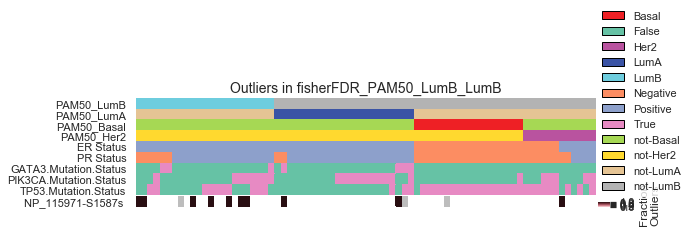

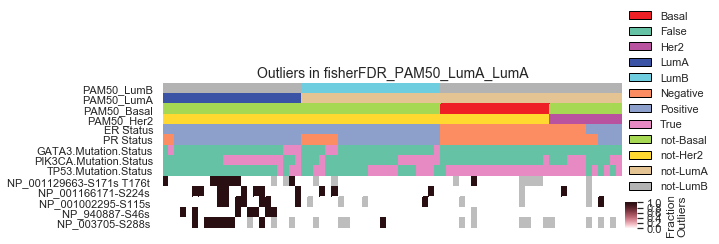

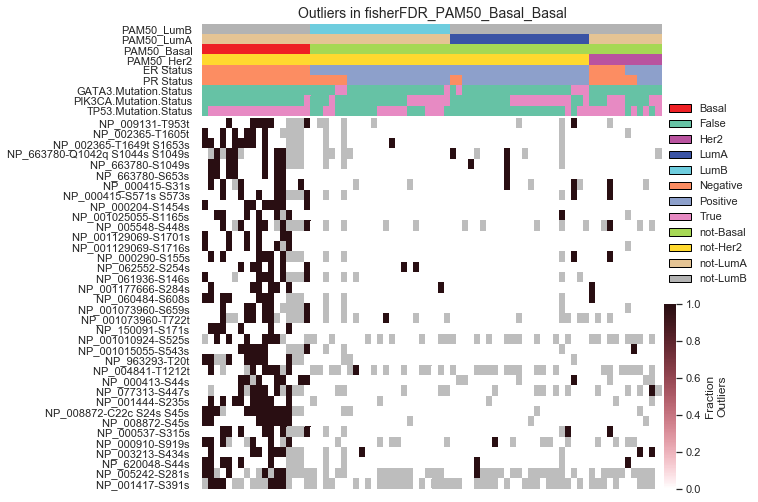

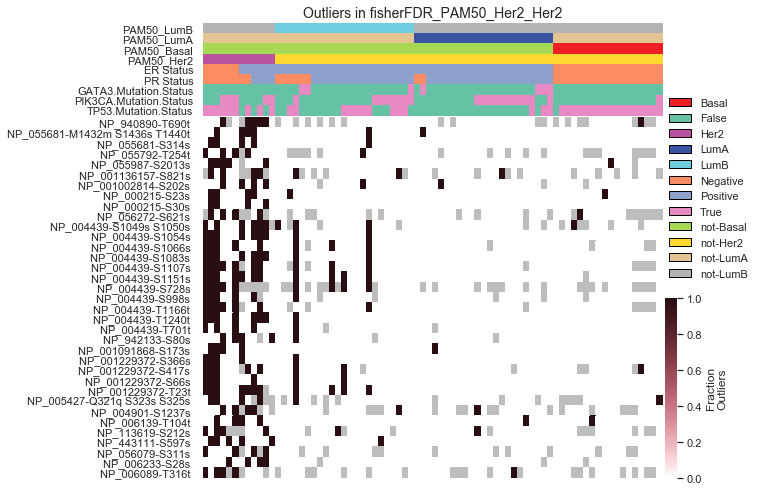

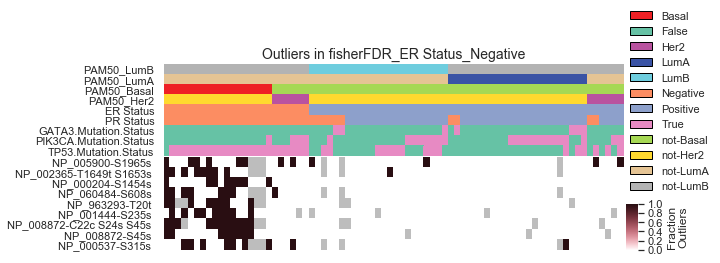

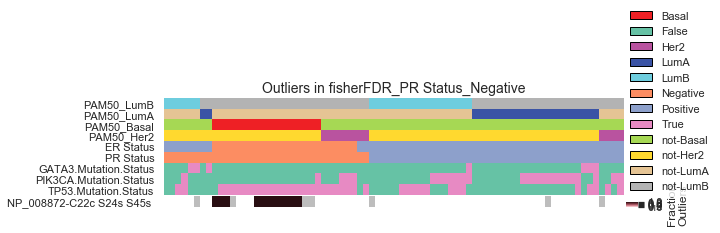

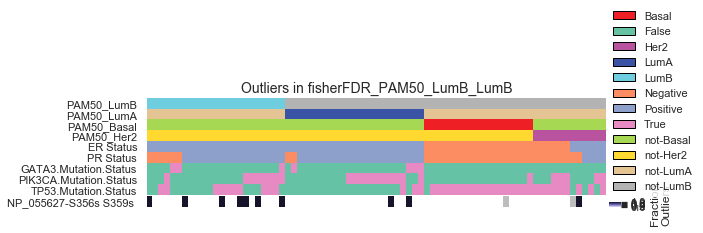

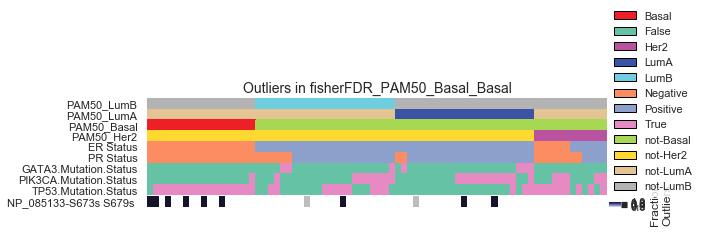

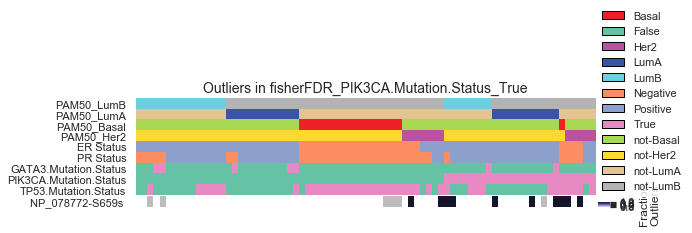

In [10]:
for updown in directions:
    if updown=='up':
        redblue = 'red'
    elif updown == 'down':
        redblue = 'blue'
    
    for col in results[updown][1].df.columns:
        deva.plot_heatmap(
            annotations, 
            results[updown][1].df, 
            col_of_interest=col, 
            vis_table=results[updown][0].frac_table, 
            fdr=0.01, 
            red_or_blue=redblue, 
            output_prefix="output/no_agg/brca.%s"%updown, 
            savefig=True,
            colors='brca/tcga_subtype_colors.txt'
        )
        

# Performing the same comparisons using rank-sum test on raw values

In [7]:
rank_sums = pd.DataFrame()
for comp in annotations.columns:
    group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)
    
    pvals = values.apply((lambda row: scipy.stats.ranksums(row[group0list], row[group1list])[1]), axis=1)
    qvals = deva.comparisons._multi_hyp_correct(pvals)
    rank_sums['%s_pval'%(comp)] = pvals
    rank_sums['%s_qval'%(comp)] = qvals
    rank_sums['%s_%s_minus_%s'%(comp, group0, group1)] = values.apply((lambda row: row[group0list].mean() - row[group1list].mean()), axis=1)
    

In [21]:
rank_sums_qs = pd.DataFrame()
for comp in annotations.columns:
    group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)
    rank_sums['%s_logqval'%(comp)] = -np.log10(rank_sums['%s_qval'%(comp)])
    
    rank_sums_qs['%s_%s'%(comp, group0)] = (rank_sums['%s_logqval'%(comp)]*(rank_sums['%s_%s_minus_%s'%(comp, group0, group1)] / rank_sums['%s_%s_minus_%s'%(comp, group0, group1)].abs()))
    

In [ ]:
for col in rank_sums_qs.columns:
    sns.distplot(rank_sums_qs[col].dropna(), kde=False)

In [ ]:
rank_sums_qs.to_csv('output/rank_sums.csv')

In [ ]:
rank_sums_qs = deva.read_in_values('output/rank_sums.csv')

# Reformatting outliers qvalues to match rank sums

In [85]:
signed_qvalues = {}
dirs = [1, -1]
for i, updown in enumerate(directions):
    df = pd.DataFrame()
    for comp in annotations.columns:
        group0, _, group1, _ = deva.comparisons.get_sample_lists(annotations, comp)
        
        signed_qs = (-np.log10(results[updown][1].df.reindex(['fisherFDR_%s_%s'%(comp, group1)], axis=1)['fisherFDR_%s_%s'%(comp, group1)]).subtract(-np.log10(results[updown][1].df.reindex(['fisherFDR_%s_%s'%(comp, group0)], axis=1)['fisherFDR_%s_%s'%(comp, group0)]), fill_value=0))
        signed_qs = dirs[i]*signed_qs
        
        signed_qs = pd.DataFrame(signed_qs)
        signed_qs.columns = ['%s_%s'%(comp, group0)]
        df = pd.concat([df, signed_qs], join='outer', axis=1)
    signed_qvalues[updown] = df
    

# Comparing with same FDR correction

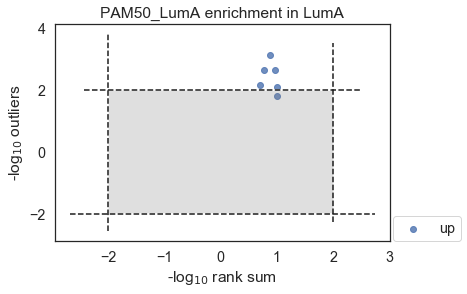

/Users/lili/anaconda3/envs/blacksheep/lib/python3.7/site-packages/pandas/core/indexing.py:1017: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


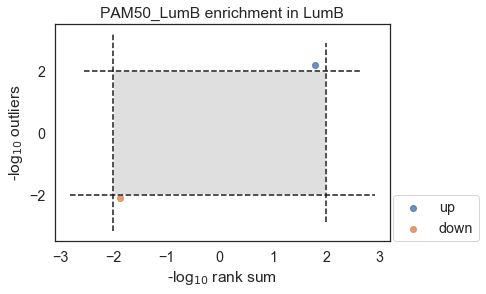

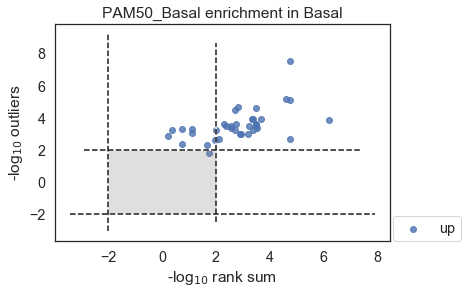

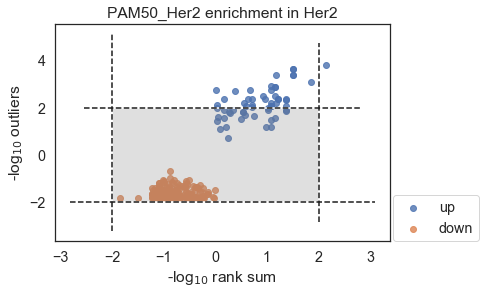

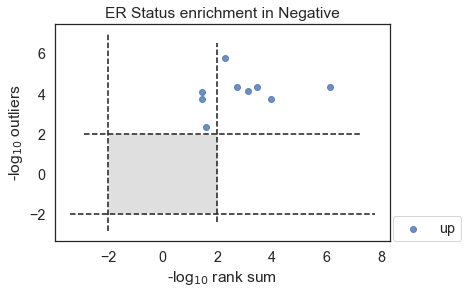

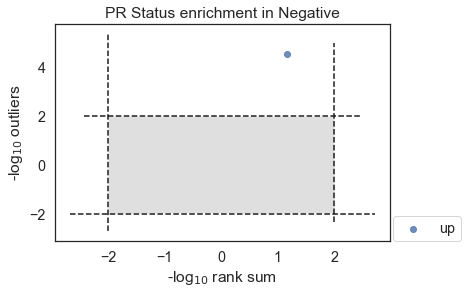

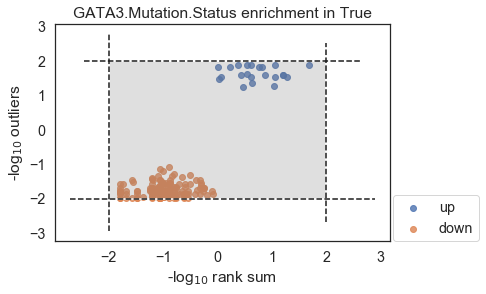

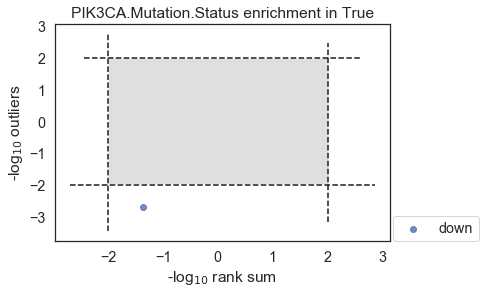

08/21/2019 16:25:06:WARNING:No handles with labels found to put in legend.


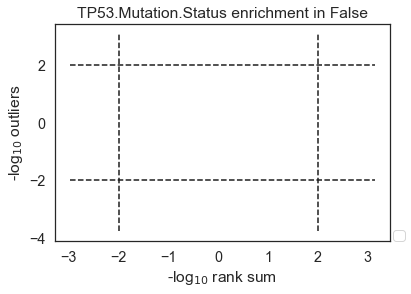

In [102]:
for col in [i for i in rank_sums.columns if 'pval' in i]:
    
    comp = col[0:-5]
    group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)
    
    rows = signed_qvalues['up'].dropna(subset=["%s_%s" %(comp, group0)]).index.union(signed_qvalues['down'].dropna(subset=["%s_%s" %(comp, group0)]).index)
    
    adjrank = rank_sums.reindex(rows)[[col]]
    adjrank['fdr'] = deva.comparisons._multi_hyp_correct(adjrank[col])
    adjrank['logqval'] = -np.log10(adjrank['fdr'])
    
    adjrank['%s_%s'%(comp, group0)] = (adjrank['logqval']*(rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)] / rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)].abs()))
    
    for updown in directions:
        if any([g for g in rows if g in signed_qvalues[updown].index]):
            ax = sns.regplot(x=-adjrank.loc[rows, '%s_%s'%(comp, group0)], y=signed_qvalues[updown].loc[rows, '%s_%s'%(comp, group0)], fit_reg=False, label=updown)
    plt.xlabel('-log$_{10}$ rank sum')
    plt.ylabel('-log$_{10}$ outliers')
    plt.title('%s enrichment in %s' %(comp, group1))
    plt.legend(loc=(1.01,0))
    plt.plot([2, 2], ax.get_ylim(), 'white')
    plt.plot( ax.get_xlim(), [2, 2],'white')
    plt.plot([-2, -2], ax.get_ylim(), 'white')
    plt.plot( ax.get_xlim(), [-2, -2],'white')
    
    plt.plot([2, 2], ax.get_ylim(), 'k--')
    plt.plot( ax.get_xlim(), [2, 2],'k--')
    plt.plot([-2, -2], ax.get_ylim(), 'k--')
    plt.plot( ax.get_xlim(), [-2, -2],'k--')
    rect = mpl.patches.Rectangle([-2, -2], 4, 4, facecolor='gray', ec=None, alpha=0.25)
    ax.add_patch(rect)
    plt.savefig('output/scatter_logqs_%s.pdf'%(comp), bbox_inches='tight')
    plt.show()
    plt.close()

# Visualizing signifant genes - Her2

In [153]:
col = 'PAM50_Her2_pval'    
comp = col[0:-5]
group0, group0list, group1, group1list = deva.comparisons.get_sample_lists(annotations, comp)

rows = signed_qvalues['up'].dropna(subset=["%s_%s" %(comp, group0)]).index.union(signed_qvalues['down'].dropna(subset=["%s_%s" %(comp, group0)]).index)

adjrank = rank_sums.reindex(rows)[[col]]
adjrank['fdr'] = deva.comparisons._multi_hyp_correct(adjrank[col])
adjrank['logqval'] = -np.log10(adjrank['fdr'])

adjrank['%s_%s'%(comp, group0)] = (adjrank['logqval']*(rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)] / rank_sums.loc[rows, '%s_%s_minus_%s'%(comp, group0, group1)].abs()))
    

In [160]:
adjrank.loc[adjrank['logqval'].abs() > 2, :]

,PAM50_Her2_pval,fdr,logqval,PAM50_Her2_not-Her2
NP_004439-T1240t,0.000028,0.00709,2.149337,-2.149337


In [107]:
sig_genes = signed_qvalues['up'].loc[signed_qvalues['up']['PAM50_Her2_not-Her2']>2, :].index

In [154]:
header = deva.read_in_values('brca/annotations_common_samples.csv').sort_values('PAM50')

In [174]:
with open('brca/CPTAC2016/gene_name_map.tsv', 'r') as fh:
    gene_map = {i.split()[0]:i.split()[1] for i in fh.readlines()}

In [175]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap.set_bad('#BDBDBD')
cmap.set_over('#9E031A')
cmap.set_under('#0C4A60')
with open('brca/tcga_subtype_colors.txt', 'r') as fh:
    colors = {i.split()[0]:i.split()[1] for i in fh.readlines()}

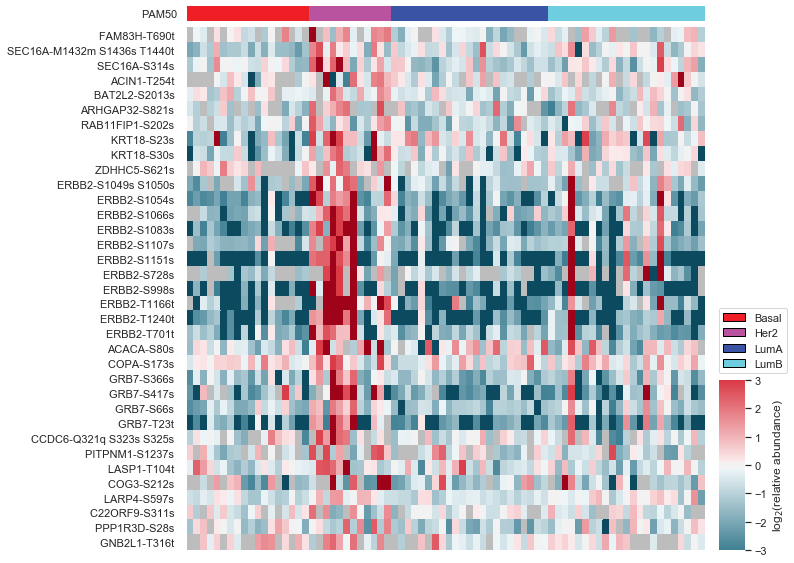

In [178]:
fig = plt.figure(figsize=(10, 10))
gs = plt.GridSpec(nrows=4, ncols=2, height_ratios=[1] +3*[len(sig_genes)/3], width_ratios=[20, 1], hspace=0.05, wspace=0.05)
annotax = plt.subplot(gs[0, 0])
heatax = plt.subplot(gs[1:, 0])
cbarax = plt.subplot(gs[-1, 1])
leg_ax = plt.subplot(gs[-2, 1])
leg_ax.axis('off')

deva.catheat.heatmap(header[['PAM50']].transpose(), 
                     ax=annotax, cmap=colors, 
                     leg_ax=leg_ax, 
                     leg_kws=dict(loc=(0, 0)), 
                     xticklabels=False)
annotax.set_yticklabels(['PAM50'], rotation=0)

sns.heatmap(values.loc[sig_genes, header.index], 
            ax=heatax, cbar_ax=cbarax, cmap=cmap,
            xticklabels=False, 
            yticklabels=['%s-%s'%(gene_map.get(i.split('-')[0], i.split('-')[0]), i.split('-')[1]) for i in sig_genes],
            vmin=-3, vmax=3,
            cbar_kws=dict(label='log$_2$(relative abundance)')
           )
plt.savefig('output/heatmap_her2_sig_genes_values.pdf', bbox_inches='tight', dpi=500)

In [169]:
annotations['PAM50_Her2'].value_counts()

not-Her2    64
Her2        12
Name: PAM50_Her2, dtype: int64

In [189]:
results['up'][1].df.iloc[0:10, 0:10]

,fisherFDR_PAM50_LumA_LumA,fisherFDR_PAM50_LumB_LumB,fisherFDR_PAM50_Basal_Basal,fisherFDR_PAM50_Her2_Her2,fisherFDR_ER Status_Negative,fisherFDR_PR Status_Negative,fisherFDR_GATA3.Mutation.Status_True
NP_005900-S1965s,NaN,NaN,0.015961,0.199268,0.004602,NaN,NaN
NP_940890-T690t,NaN,NaN,NaN,0.001733,NaN,NaN,NaN
NP_009131-T953t,NaN,NaN,0.000534,NaN,NaN,NaN,NaN
NP_055681-M1432m S1436s T1440t,NaN,NaN,NaN,0.008331,NaN,NaN,NaN
NP_055681-S314s,NaN,NaN,NaN,0.004509,NaN,NaN,NaN
NP_055792-T254t,NaN,NaN,NaN,0.007345,NaN,NaN,NaN
NP_002365-T1605t,NaN,NaN,0.000124,NaN,NaN,NaN,NaN
NP_002365-T1649t S1653s,NaN,NaN,0.000034,NaN,0.000178,NaN,NaN
NP_055987-S2013s,NaN,NaN,NaN,0.001177,NaN,NaN,NaN
NP_001059-S1517s S1519s,NaN,NaN,NaN,NaN,NaN,NaN,0.024931


# Agged

In [15]:
results = {}
updown='up'
outliers, qvalues = deva.deva(
    values, annotations,
    aggregate=True,
    save_outlier_table=True, 
    save_frac_table=True, 
    save_qvalues=True,
    up_or_down=updown, 
    save_comparison_summaries=True, 
    output_prefix="output/agg/brca",
)

/Users/lili/anaconda3/envs/blacksheep/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1354: RuntimeWarning: All-NaN slice encountered
  overwrite_input, interpolation)
